In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models

import gensim

In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
print len(df.index)

404290


In [4]:
#id1 = df['qid1'].tolist()
#id2 = df['qid2'].tolist()
qu1 = df['question1'].tolist()
qu2 = df['question2'].tolist()
dup = df['is_duplicate'].tolist()

In [6]:
tokenizer = RegexpTokenizer(r'[a-z]+')
en_stop = get_stop_words('en')
p_stemmer = SnowballStemmer("english")

In [7]:
for c,j in enumerate(qu1):
    try:
        # clean and tokenize document string
        raw = j.lower()
        #print raw
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        #print tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        qu1[c] = [p_stemmer.stem(i) for i in stopped_tokens]
        
    except:
        print i,c,j

In [8]:
#change qu1 <-> qu2.
for c,j in enumerate(qu2):
    try:
        # clean and tokenize document string
        raw = j.lower()
        #print raw
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        #print tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        qu2[c] = [p_stemmer.stem(i) for i in stopped_tokens]
        
    except:
        print i,c,j

youtube 105780 nan
anger 201841 nan


In [9]:
qu2[105780] = []
qu2[201841] = []

In [10]:
vocab_freq = {}

In [12]:
counter = 0
for i in range(0,len(qu1)):
    for j in qu1[i]:
        if j not in vocab_freq:
            vocab_freq[j] = [counter,1]
            counter += 1
        else:
            vocab_freq[j][1] += 1
    for j in qu2[i]:
        if j not in vocab_freq:
            vocab_freq[j] = [counter,1]
            counter += 1
        else:
            vocab_freq[j][1] += 1
print counter

58592


In [20]:
np.save("vocab_freq.npy",vocab_freq)

In [22]:
graph = {}
weight = 1.01

In [23]:
for i in range(0,len(qu1)):
    q_list1 = []
    q_list2 = []
    for j in qu1[i]:
        q_list1.append(vocab_freq[j][0])
    for j in qu2[i]:
        q_list2.append(vocab_freq[j][0])
    q_list1 = set(q_list1)
    q_list2 = set(q_list2)
    q_list1 = q_list1 - q_list2
    q_list2 = q_list2 - q_list1
    for j in q_list1:
        for k in q_list2:
            if not ((j,k) in graph) and not ((k,j) in graph):
                if dup[i] == 1:
                    graph[(j,k)] = weight
                else:
                    graph[(j,k)] = 1.0/weight
            elif (j,k) in graph:
                if dup[i] == 1:
                    graph[(j,k)] *= weight
                else:
                    graph[(j,k)] /= weight
            elif (k,j) in graph:
                if dup[i] == 1:
                    graph[(k,j)] *= weight
                else:
                    graph[(k,j)] /= weight
                
    

In [24]:
np.save("graph.npy",graph)

In [49]:
word1 = "modi"
word2 = "india"
print vocab_freq[word1][1]
print vocab_freq[word2][1]
print 
a = vocab_freq[word1][0]
b = vocab_freq[word2][0]
if (a,b) in graph:
    print graph[(a,b)]
elif (b,a) in graph:
    print graph[(b,a)]

2788
29586

2.42438878678


In [52]:
score_dup = []
score_dif = []
t_hold = 1.0

In [53]:
for i in range(0,len(qu1)):
    q_list1 = []
    q_list2 = []
    for j in qu1[i]:
        q_list1.append(vocab_freq[j][0])
    for j in qu2[i]:
        q_list2.append(vocab_freq[j][0])
    q_list1 = set(q_list1)
    q_list2 = set(q_list2)
    q_list1 = q_list1 - q_list2
    q_list2 = q_list2 - q_list1
    sc = 0
    for j in q_list1:
        for k in q_list2:
            if (j,k) in graph:
                sc += graph[(j,k)]
            elif (k,j) in graph:
                sc += graph[(k,j)]
            else:
                sc += t_hold
    if len(q_list1)*len(q_list2) !=0:
        sc /= (len(q_list1)*len(q_list2))
    else:
        sc = 0
    if dup[i] ==1:
        score_dup.append(sc)
    else:
        score_dif.append(sc)
    

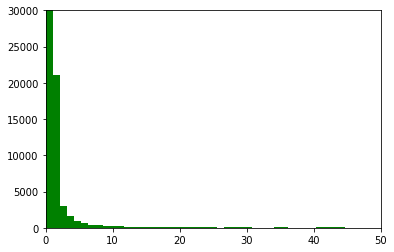

In [87]:
plt.figure(1)
_,bins1,_ = plt.hist(score_dup,1000,facecolor='green')
#plt.plot(bins1)
plt.axis([0, 50, 0, 30000])
plt.show()

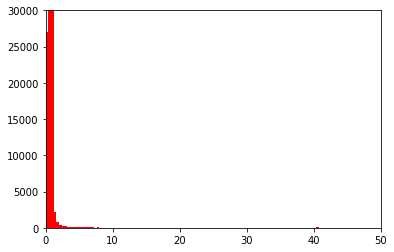

In [88]:
plt.figure(2)
_,bins2,_ = plt.hist(score_dif,1000,facecolor='red')
#plt.plot(bins2)
plt.axis([0, 50, 0, 30000])
plt.show()